<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_008_comparing_means_with_unequal_variances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Compare Means with Unequal Variances**

1. **Test for Equality of Variances**:
   - Using an **F-Test**, we assess whether the variances of sepal length differ significantly between `setosa` and `versicolor`.
   - This step determines if the assumption of equal variances is valid, which informs the choice of subsequent statistical tests.

2. **Compare Means with Unequal Variances**:
   - Based on the F-Test result, we apply **Welch’s t-test**, a robust method that accounts for unequal variances, to compare the mean sepal lengths between the two species.
   - This test identifies whether the average sepal lengths of `setosa` and `versicolor` are significantly different.

3. **Interpret Results**:
   - Combine the findings from the F-Test and Welch’s t-test to provide a comprehensive understanding of the differences in sepal length between the two species.
   - Highlight the implications of the findings, such as variability in traits and species-specific distinctions.


#### **Value of This Analysis**
1. **Proper Statistical Procedures**:
   - Demonstrates the importance of checking assumptions (e.g., equality of variances) before selecting a hypothesis test.
   - Introduces robust methods like Welch’s t-test for unequal variances.

2. **Biological Relevance**:
   - Provides insights into the distinct traits of `setosa` and `versicolor`, such as differences in sepal length and its variability.

3. **Educational Use**:
   - Serves as a step-by-step guide for performing and interpreting statistical tests, emphasizing the correct follow-up procedures based on test results.



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### F-Test for Equality of Variances

### **Question**  
Do the variances of `sepal length` differ significantly between `setosa` and `versicolor`?

---

### **F-Test for Equality of Variances**  
- **Null Hypothesis (\(H_0\))**: The variances of `sepal length` for `setosa` and `versicolor` are equal.  
- **Alternative Hypothesis (\(H_1\))**: The variances of `sepal length` for `setosa` and `versicolor` are not equal.  

---

### **Analysis and Interpretation**  
- The boxplot shows the variability in `sepal length` for `setosa` and `versicolor`, with visible differences in the spread of values.  
- The test statistic (\(110.69\)) indicates a substantial difference in variances between the two groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the variances of `sepal length` for `setosa` and `versicolor` are significantly different.  

---

### **Comparison to Levene’s Test**
- While the **F-Test** focuses on comparing two groups and assumes normality, the **Levene’s Test** can handle multiple groups and is more robust to non-normality.  
- Both tests have reached the same conclusion for the variances in this case.


F-Test for Equality of Variances:
Test Statistic: 110.69
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly between the two groups.




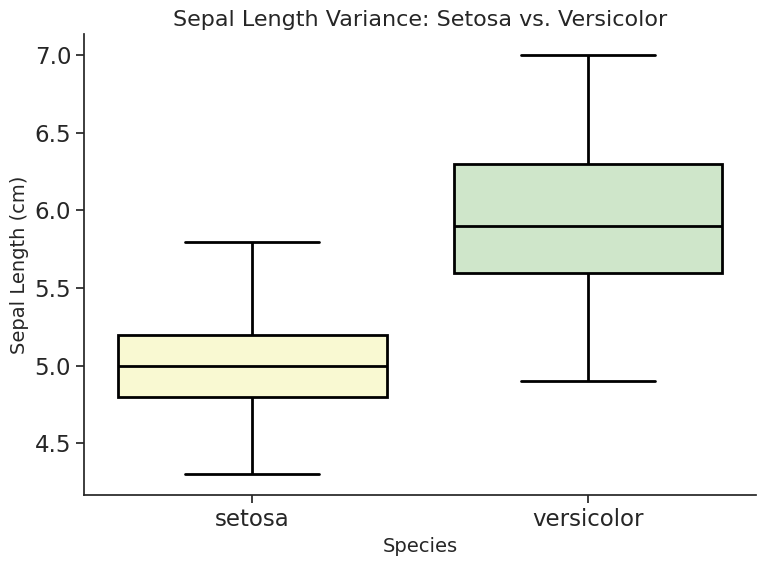

In [2]:
from scipy.stats import f_oneway

# Set Seaborn theme, style, and palette
sns.set_theme(style="ticks", palette="Pastel1_r")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Extract sepal length data for two species
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']

# Perform F-Test (ANOVA for two groups)
stat, p_value = f_oneway(setosa_sepal_length, versicolor_sepal_length)

# Output results
print("F-Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between the two groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between the two groups.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df[iris_df['species'].isin(['setosa', 'versicolor'])],
            x='species', y='sepal length (cm)', hue='species', palette="Pastel1_r", linewidth=2, linecolor='k')
plt.title("Sepal Length Variance: Setosa vs. Versicolor", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


Based on the **F-Test for Equality of Variances**, where the null hypothesis was rejected (p-value = 0.0000), we’ve determined that the **variances of sepal length between `setosa` and `versicolor` differ significantly**. This means the assumption of equal variances is violated, so the next steps depend on your **analysis goals**. Here are the next steps.

---

### **1. Comparing Means with Unequal Variances**
- Use **Welch’s t-test** instead of a standard t-test to compare the means between the two groups.
- Welch’s t-test is robust to differences in variances and adjusts the degrees of freedom accordingly.



---

### **2. Visualizing Group Differences**
- Plot the means and distributions of the two groups to visually inspect the differences in central tendency and variability.

**Visualization Ideas**:
- **Boxplot**: Already implemented; useful for showing variance and mean differences.
- **KDE Plot**: Overlay the density distributions of the two groups for a clearer view of overlap.

---

### **3. Exploring Practical Implications**
If Welch’s t-test indicates significant differences in means, consider reporting:
- **Effect Size**: Quantify the magnitude of the difference (e.g., Cohen’s \(d\)).
- **Practical Significance**: Discuss whether the difference is meaningful in your research context.

---

### **4. Broader Implications**
- If this comparison of variances is part of a larger analysis (e.g., multiple groups or additional variables), extend the analysis with:
  - **ANOVA for more than two groups** (e.g., all species).
  - **Post-Hoc Analysis** if ANOVA is significant.

---

### **Summary of Steps**
1. **Welch’s t-Test**: Compare group means accounting for unequal variances.
2. **Visualize Distributions**: Use KDE plots or boxplots to better understand differences.
3. **Effect Size**: Calculate Cohen’s \(d\) to quantify the magnitude of the difference.
4. **Post-Hoc or ANOVA Extensions**: If applicable, move to multi-group comparisons or additional features.


In [3]:
from scipy.stats import ttest_ind

# Perform Welch's t-test
t_stat, p_value = ttest_ind(setosa_sepal_length, versicolor_sepal_length, equal_var=False)

# Output results
print("Welch's T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The means of sepal length differ significantly between the two groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in means.")

Welch's T-Test Results:
T-Statistic: -10.52
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The means of sepal length differ significantly between the two groups.


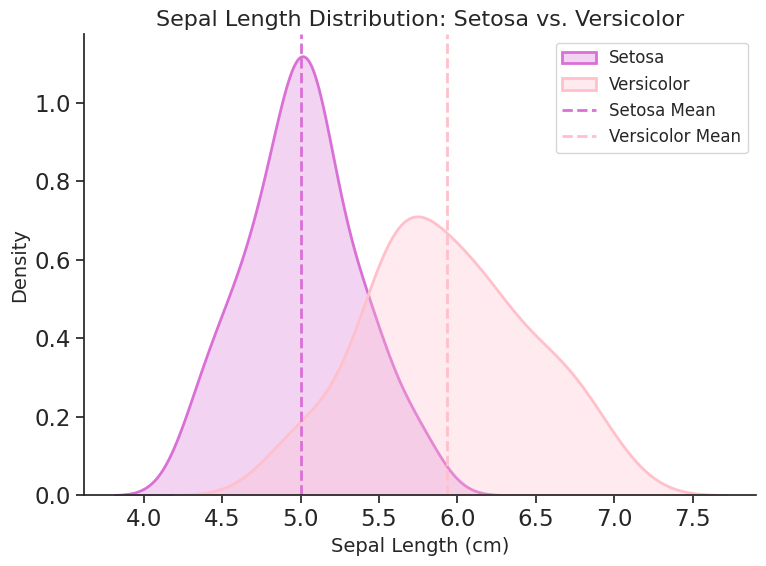

In [5]:
# KDE Plot for Group Comparisons
plt.figure(figsize=(8, 6))
sns.kdeplot(setosa_sepal_length, fill=True, alpha=0.3, linewidth=2, label="Setosa", color="orchid")
sns.kdeplot(versicolor_sepal_length, fill=True, alpha=0.3, linewidth=2, label="Versicolor", color="pink")
plt.axvline(x=setosa_sepal_length.mean(), color="orchid", linestyle="--", linewidth=2, label="Setosa Mean")
plt.axvline(x=versicolor_sepal_length.mean(), color="pink", linestyle="--", linewidth=2, label="Versicolor Mean")
plt.title("Sepal Length Distribution: Setosa vs. Versicolor", fontsize=16)
plt.xlabel("Sepal Length (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

### **Summary Interpretation: F-Test and Welch's T-Test**

#### **1. F-Test for Equality of Variances**
- **Test Statistic**: \(110.69\)
- **P-Value**: \(0.0000\)
- **Conclusion**: The variances of sepal length between `setosa` and `versicolor` differ significantly. This violates the assumption of equal variances required for standard t-tests or pooled ANOVA.

---

#### **2. Welch’s T-Test for Means**
- **Test Statistic**: \(-10.52\)
- **P-Value**: \(0.0000\)
- **Conclusion**: The means of sepal length differ significantly between `setosa` and `versicolor`, even after accounting for unequal variances.

---

#### **Combined Interpretation**
1. **Variances Differ**:
   - The F-test result indicates that the variability in sepal length is not consistent across the two species.
   - This reinforces the importance of using Welch’s t-test, which adjusts for unequal variances.

2. **Means Differ**:
   - Welch’s t-test confirms a statistically significant difference in the average sepal lengths of `setosa` and `versicolor`.
   - The negative t-statistic (\(-10.52\)) indicates that the mean sepal length of `setosa` is **smaller** than that of `versicolor`.

3. **Practical Implications**:
   - Both the variability and the central tendency (mean) differ significantly between the two species.
   - These differences may have biological or observational relevance, suggesting distinct traits between `setosa` and `versicolor`.

---

### **Next Steps**
1. **Effect Size**: Calculate Cohen’s \(d\) to quantify the magnitude of the difference in means.
2. **Visualization**: Create KDE plots or boxplots to illustrate the mean and variance differences visually.
3. **Broader Context**: Extend this analysis to other species or features in the dataset to understand how variability and means compare more broadly.


In [6]:
import numpy as np

# Calculate Cohen's d
mean_diff = setosa_sepal_length.mean() - versicolor_sepal_length.mean()
pooled_sd = np.sqrt(((setosa_sepal_length.std() ** 2) + (versicolor_sepal_length.std() ** 2)) / 2)
cohens_d = mean_diff / pooled_sd

print(f"Cohen's d: {cohens_d:.2f}")

Cohen's d: -2.10
